In [1]:
%matplotlib inline
from cox import readers
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np
sns.set()

In [2]:
r = readers.CollectionReader('agents')

100%|██████████████████████████████████████████████████████████████████████████████████| 32/32 [00:00<00:00, 70.64it/s]


In [3]:
metadata = r.df('metadata')
opt = r.df('optimization')

In [4]:
code_level_opts = {
      'value_clipping': [False, True],
      'norm_rewards': ["none", "returns"],
      'anneal_lr': [False, True],
      'initialization': ['xavier', 'orthogonal']
}

NUM_BINS = 20

# Plot Results (using max reward)

c:\users\csbhliu\appdata\local\continuum\anaconda3\envs\ierg5350\lib\site-packages\ipykernel_launcher.py:17: RuntimeWarning: invalid value encountered in true_divide


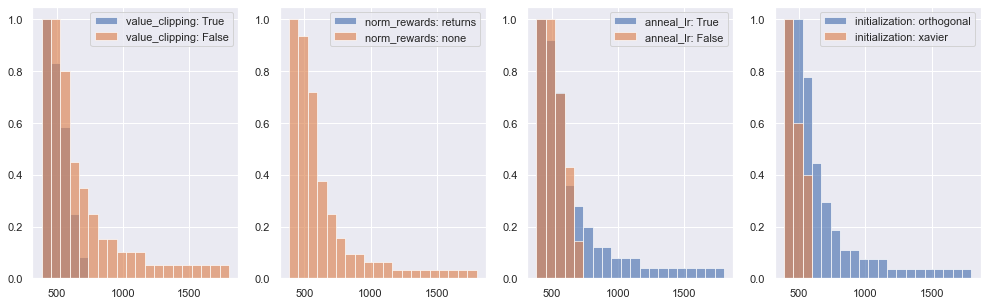

In [5]:
max_rewards = opt.groupby('exp_id').max()

# Histogram setup
_, bin_edges = np.histogram(max_rewards['mean_reward'].tolist(), NUM_BINS)
bin_locs = (bin_edges[:-1] + bin_edges[1:]) / 2
bin_ws = (bin_edges[1] - bin_edges[0])

# Plot setup
kwargs = {'width': bin_ws, 'alpha': 0.65}
fig, ax = plt.subplots(1, 4, figsize=(17,5))

for i, cl_opt in enumerate(code_level_opts):
    for b in reversed(code_level_opts[cl_opt]):
        exp_ids = set(metadata[metadata[cl_opt] == b]['exp_id'].tolist())
        filt = max_rewards[max_rewards.index.isin(exp_ids)]
        hist, _ = np.histogram(filt['mean_reward'].tolist(), bin_edges)
        hist = np.flip(np.cumsum(np.flip(hist))) / np.sum(hist)
        ax[i].bar(bin_locs, hist, label=f"{cl_opt}: {b}", **kwargs)
    ax[i].legend()
plt.show()

# Aggregate performance (max over learning rates, avg over trials)

In [11]:
max_rewards

,mean_reward,final_value_loss,mean_std
exp_id,,,
0532ebef-9ada-4449-a6d8-018fadb75eb8,576.382756,4320.191895,0.994966
0c22dd9e-0603-4383-8f17-26507379345d,495.493252,1965.416260,0.999932
1cbf5a43-6158-4669-992c-27091104bc8f,402.981017,2021.138916,0.987135
200bdbef-e144-48de-82ce-708f2ae67b49,671.131230,4276.658203,0.996433
29d54596-469e-4e5c-a95c-8060e817b4f1,574.924697,3327.055176,0.994779
3ac2c8f4-3d30-424b-be70-09ba73f8f332,620.138081,6037.557617,0.994740
453a73d7-5dac-4857-b5a9-dc6281182ec7,1799.258212,3493.684814,0.996747
4e4f0761-c40a-4491-ac28-0faebbb03314,757.539246,5247.112305,0.995530
5d983b28-4d95-4005-b950-5be8c939e726,493.681360,1645.498169,1.000027


In [12]:
metadata

,game,mode,value_calc,num_minibatches,policy_net_type,value_net_type,num_actors,norm_states,norm_rewards,ppo_lr,...,advanced_logging,log_every,adam_eps,kl_approximation_iters,save_iters,out_dir,clip_grad_norm,store_path,git_commit,exp_id
0,Humanoid-v2,ppo,gae,32,CtsPolicy,ValueNet,1,True,none,-1,...,False,10,0.00001,-1,0,case_study_experiment/agents,-1,C:\Users\csbhliu\Desktop\PPO_TRPO\src\case_stu...,094994f2bfd154d565c34f5d24a7ade00e0c5bdb,0532ebef-9ada-4449-a6d8-018fadb75eb8
0,Humanoid-v2,ppo,gae,32,CtsPolicy,ValueNet,1,True,none,-1,...,False,10,0.00001,-1,0,case_study_experiment/agents,-1,C:\Users\csbhliu\Desktop\PPO_TRPO\src\case_stu...,094994f2bfd154d565c34f5d24a7ade00e0c5bdb,0c22dd9e-0603-4383-8f17-26507379345d
0,Humanoid-v2,ppo,gae,32,CtsPolicy,ValueNet,1,True,none,-1,...,False,10,0.00001,-1,0,case_study_experiment/agents,-1,C:\Users\csbhliu\Desktop\PPO_TRPO\src\case_stu...,094994f2bfd154d565c34f5d24a7ade00e0c5bdb,1cbf5a43-6158-4669-992c-27091104bc8f
0,Humanoid-v2,ppo,gae,32,CtsPolicy,ValueNet,1,True,none,-1,...,False,10,0.00001,-1,0,case_study_experiment/agents,-1,C:\Users\csbhliu\Desktop\PPO_TRPO\src\case_stu...,094994f2bfd154d565c34f5d24a7ade00e0c5bdb,200bdbef-e144-48de-82ce-708f2ae67b49
0,Humanoid-v2,ppo,gae,32,CtsPolicy,ValueNet,1,True,none,-1,...,False,10,0.00001,-1,0,case_study_experiment/agents,-1,C:\Users\csbhliu\Desktop\PPO_TRPO\src\case_stu...,094994f2bfd154d565c34f5d24a7ade00e0c5bdb,29d54596-469e-4e5c-a95c-8060e817b4f1
0,Humanoid-v2,ppo,gae,32,CtsPolicy,ValueNet,1,True,none,-1,...,False,10,0.00001,-1,0,case_study_experiment/agents,-1,C:\Users\csbhliu\Desktop\PPO_TRPO\src\case_stu...,094994f2bfd154d565c34f5d24a7ade00e0c5bdb,3ac2c8f4-3d30-424b-be70-09ba73f8f332
0,Humanoid-v2,ppo,gae,32,CtsPolicy,ValueNet,1,True,none,-1,...,False,10,0.00001,-1,0,case_study_experiment/agents,-1,C:\Users\csbhliu\Desktop\PPO_TRPO\src\case_stu...,094994f2bfd154d565c34f5d24a7ade00e0c5bdb,453a73d7-5dac-4857-b5a9-dc6281182ec7
0,Humanoid-v2,ppo,gae,32,CtsPolicy,ValueNet,1,True,none,-1,...,False,10,0.00001,-1,0,case_study_experiment/agents,-1,C:\Users\csbhliu\Desktop\PPO_TRPO\src\case_stu...,094994f2bfd154d565c34f5d24a7ade00e0c5bdb,4e4f0761-c40a-4491-ac28-0faebbb03314
0,Humanoid-v2,ppo,gae,32,CtsPolicy,ValueNet,1,True,none,-1,...,False,10,0.00001,-1,0,case_study_experiment/agents,-1,C:\Users\csbhliu\Desktop\PPO_TRPO\src\case_stu...,094994f2bfd154d565c34f5d24a7ade00e0c5bdb,5d983b28-4d95-4005-b950-5be8c939e726
0,Humanoid-v2,ppo,gae,32,CtsPolicy,ValueNet,1,True,none,-1,...,False,10,0.00001,-1,0,case_study_experiment/agents,-1,C:\Users\csbhliu\Desktop\PPO_TRPO\src\case_stu...,094994f2bfd154d565c34f5d24a7ade00e0c5bdb,5e830cb9-2f9b-4956-9f61-77390f1f055c


In [8]:
max_rewards.merge(metadata, on='exp_id')

,exp_id,mean_reward,final_value_loss,mean_std,game,mode,value_calc,num_minibatches,policy_net_type,value_net_type,...,cpu,advanced_logging,log_every,adam_eps,kl_approximation_iters,save_iters,out_dir,clip_grad_norm,store_path,git_commit
0,0532ebef-9ada-4449-a6d8-018fadb75eb8,576.382756,4320.191895,0.994966,Humanoid-v2,ppo,gae,32,CtsPolicy,ValueNet,...,True,False,10,0.00001,-1,0,case_study_experiment/agents,-1,C:\Users\csbhliu\Desktop\PPO_TRPO\src\case_stu...,094994f2bfd154d565c34f5d24a7ade00e0c5bdb
1,0c22dd9e-0603-4383-8f17-26507379345d,495.493252,1965.416260,0.999932,Humanoid-v2,ppo,gae,32,CtsPolicy,ValueNet,...,True,False,10,0.00001,-1,0,case_study_experiment/agents,-1,C:\Users\csbhliu\Desktop\PPO_TRPO\src\case_stu...,094994f2bfd154d565c34f5d24a7ade00e0c5bdb
2,1cbf5a43-6158-4669-992c-27091104bc8f,402.981017,2021.138916,0.987135,Humanoid-v2,ppo,gae,32,CtsPolicy,ValueNet,...,True,False,10,0.00001,-1,0,case_study_experiment/agents,-1,C:\Users\csbhliu\Desktop\PPO_TRPO\src\case_stu...,094994f2bfd154d565c34f5d24a7ade00e0c5bdb
3,200bdbef-e144-48de-82ce-708f2ae67b49,671.131230,4276.658203,0.996433,Humanoid-v2,ppo,gae,32,CtsPolicy,ValueNet,...,True,False,10,0.00001,-1,0,case_study_experiment/agents,-1,C:\Users\csbhliu\Desktop\PPO_TRPO\src\case_stu...,094994f2bfd154d565c34f5d24a7ade00e0c5bdb
4,29d54596-469e-4e5c-a95c-8060e817b4f1,574.924697,3327.055176,0.994779,Humanoid-v2,ppo,gae,32,CtsPolicy,ValueNet,...,True,False,10,0.00001,-1,0,case_study_experiment/agents,-1,C:\Users\csbhliu\Desktop\PPO_TRPO\src\case_stu...,094994f2bfd154d565c34f5d24a7ade00e0c5bdb
5,3ac2c8f4-3d30-424b-be70-09ba73f8f332,620.138081,6037.557617,0.994740,Humanoid-v2,ppo,gae,32,CtsPolicy,ValueNet,...,True,False,10,0.00001,-1,0,case_study_experiment/agents,-1,C:\Users\csbhliu\Desktop\PPO_TRPO\src\case_stu...,094994f2bfd154d565c34f5d24a7ade00e0c5bdb
6,453a73d7-5dac-4857-b5a9-dc6281182ec7,1799.258212,3493.684814,0.996747,Humanoid-v2,ppo,gae,32,CtsPolicy,ValueNet,...,True,False,10,0.00001,-1,0,case_study_experiment/agents,-1,C:\Users\csbhliu\Desktop\PPO_TRPO\src\case_stu...,094994f2bfd154d565c34f5d24a7ade00e0c5bdb
7,4e4f0761-c40a-4491-ac28-0faebbb03314,757.539246,5247.112305,0.995530,Humanoid-v2,ppo,gae,32,CtsPolicy,ValueNet,...,True,False,10,0.00001,-1,0,case_study_experiment/agents,-1,C:\Users\csbhliu\Desktop\PPO_TRPO\src\case_stu...,094994f2bfd154d565c34f5d24a7ade00e0c5bdb
8,5d983b28-4d95-4005-b950-5be8c939e726,493.681360,1645.498169,1.000027,Humanoid-v2,ppo,gae,32,CtsPolicy,ValueNet,...,True,False,10,0.00001,-1,0,case_study_experiment/agents,-1,C:\Users\csbhliu\Desktop\PPO_TRPO\src\case_stu...,094994f2bfd154d565c34f5d24a7ade00e0c5bdb
9,5e830cb9-2f9b-4956-9f61-77390f1f055c,733.951038,3960.251465,0.997227,Humanoid-v2,ppo,gae,32,CtsPolicy,ValueNet,...,True,False,10,0.00001,-1,0,case_study_experiment/agents,-1,C:\Users\csbhliu\Desktop\PPO_TRPO\src\case_stu...,094994f2bfd154d565c34f5d24a7ade00e0c5bdb


In [13]:
ks + ['ppo_lr_adam']

['value_clipping',
 'norm_rewards',
 'anneal_lr',
 'initialization',
 'ppo_lr_adam']

In [16]:
max_rewards.merge(metadata, on='exp_id').groupby(ks + ['ppo_lr_adam']).mean()

mean_reward  \
value_clipping norm_rewards anneal_lr initialization ppo_lr_adam                
False          none         True      orthogonal     0.00001       511.001871   
                                                     0.00008      1069.390783   
                                                     0.00015       636.512841   
                                                     0.00022       556.969548   
True           none         False     orthogonal     0.00001       575.238749   
                                                     0.00008       686.310475   
                                                     0.00015       569.362446   
                                                     0.00022       485.446774   
                            True      xavier         0.00001       520.703768   
                                                     0.00008       531.860985   
                                                     0.00015       402.981017   
                                                     0.00022       385.168484   

                                                                  final_value_loss  \
value_clipping norm_rewards anneal_lr initialization ppo_lr_adam                     
False          none         True      orthogonal     0.00001           1809.604663   
                                                     0.00008           3497.076514   
                                                     0.00015           3901.664258   
                                                     0.00022           3011.724463   
True           none         False     orthogonal     0.00001           2381.932739   
                                                     0.00008           3747.670288   
                                                     0.00015           4862.941040   
                                                     0.00022           4566.659180   
                            True      xavier         0.00001           2104.388611   
                                                     0.00008           2813.796875   
                                                     0.00015           2021.138916   
                                                     0.00022           1839.258667   

                                                                  mean_std  \
value_clipping norm_rewards anneal_lr initialization ppo_lr_adam             
False          none         True      orthogonal     0.00001      1.000002   
                                                     0.00008      0.997453   
                                                     0.00015      0.995451   
                                                     0.00022      0.994299   
True           none         False     orthogonal     0.00001      0.999999   
                                                     0.00008      0.997865   
                                                     0.00015      0.995738   
                                                     0.00022      0.993373   
                            True      xavier         0.00001      0.999310   
                                                     0.00008      0.991362   
                                                     0.00015      0.987135   
                                                     0.00022      0.984373   

                                                                  num_minibatches  \
value_clipping norm_rewards anneal_lr initialization ppo_lr_adam                    
False          none         True      orthogonal     0.00001                   32   
                                                     0.00008                   32   
                                                     0.00015                   32   
                                                     0.00022                   32   
True           none         False     orthogonal     0.00001                   32   
                                      

In [38]:
max_rewards.merge(metadata, on='exp_id').groupby(ks + ['ppo_lr_adam']).mean().reset_index()

,value_clipping,norm_rewards,anneal_lr,initialization,ppo_lr_adam,mean_reward,final_value_loss,mean_std,num_minibatches,num_actors,...,train_steps,share_weights,value_multiplier,cpu,advanced_logging,log_every,adam_eps,kl_approximation_iters,save_iters,clip_grad_norm
0,False,none,True,orthogonal,0.00001,511.001871,1809.604663,1.000002,32,1,...,500,False,0.1,True,False,10,0.00001,-1,0,-1
1,False,none,True,orthogonal,0.00008,1069.390783,3497.076514,0.997453,32,1,...,500,False,0.1,True,False,10,0.00001,-1,0,-1
2,False,none,True,orthogonal,0.00015,636.512841,3901.664258,0.995451,32,1,...,500,False,0.1,True,False,10,0.00001,-1,0,-1
3,False,none,True,orthogonal,0.00022,556.969548,3011.724463,0.994299,32,1,...,500,False,0.1,True,False,10,0.00001,-1,0,-1
4,True,none,False,orthogonal,0.00001,575.238749,2381.932739,0.999999,32,1,...,500,False,0.1,True,False,10,0.00001,-1,0,-1
5,True,none,False,orthogonal,0.00008,686.310475,3747.670288,0.997865,32,1,...,500,False,0.1,True,False,10,0.00001,-1,0,-1
6,True,none,False,orthogonal,0.00015,569.362446,4862.941040,0.995738,32,1,...,500,False,0.1,True,False,10,0.00001,-1,0,-1
7,True,none,False,orthogonal,0.00022,485.446774,4566.659180,0.993373,32,1,...,500,False,0.1,True,False,10,0.00001,-1,0,-1
8,True,none,True,xavier,0.00001,520.703768,2104.388611,0.999310,32,1,...,500,False,0.1,True,False,10,0.00001,-1,0,-1
9,True,none,True,xavier,0.00008,531.860985,2813.796875,0.991362,32,1,...,500,False,0.1,True,False,10,0.00001,-1,0,-1


In [39]:
max_rewards.merge(metadata, on='exp_id').groupby(ks + ['ppo_lr_adam']).mean().reset_index().set_index('mean_reward')

,value_clipping,norm_rewards,anneal_lr,initialization,ppo_lr_adam,final_value_loss,mean_std,num_minibatches,num_actors,norm_states,...,train_steps,share_weights,value_multiplier,cpu,advanced_logging,log_every,adam_eps,kl_approximation_iters,save_iters,clip_grad_norm
mean_reward,,,,,,,,,,,,,,,,,,,,,
511.001871,False,none,True,orthogonal,0.00001,1809.604663,1.000002,32,1,True,...,500,False,0.1,True,False,10,0.00001,-1,0,-1
1069.390783,False,none,True,orthogonal,0.00008,3497.076514,0.997453,32,1,True,...,500,False,0.1,True,False,10,0.00001,-1,0,-1
636.512841,False,none,True,orthogonal,0.00015,3901.664258,0.995451,32,1,True,...,500,False,0.1,True,False,10,0.00001,-1,0,-1
556.969548,False,none,True,orthogonal,0.00022,3011.724463,0.994299,32,1,True,...,500,False,0.1,True,False,10,0.00001,-1,0,-1
575.238749,True,none,False,orthogonal,0.00001,2381.932739,0.999999,32,1,True,...,500,False,0.1,True,False,10,0.00001,-1,0,-1
686.310475,True,none,False,orthogonal,0.00008,3747.670288,0.997865,32,1,True,...,500,False,0.1,True,False,10,0.00001,-1,0,-1
569.362446,True,none,False,orthogonal,0.00015,4862.941040,0.995738,32,1,True,...,500,False,0.1,True,False,10,0.00001,-1,0,-1
485.446774,True,none,False,orthogonal,0.00022,4566.659180,0.993373,32,1,True,...,500,False,0.1,True,False,10,0.00001,-1,0,-1
520.703768,True,none,True,xavier,0.00001,2104.388611,0.999310,32,1,True,...,500,False,0.1,True,False,10,0.00001,-1,0,-1


In [49]:
max_rewards.merge(metadata, on='exp_id').groupby(ks + ['ppo_lr_adam']).mean().reset_index().set_index('mean_reward').groupby(ks).idxmax()

KeyError: 0

In [33]:
ks = list(code_level_opts.keys())
grouped_1 = max_rewards.merge(metadata, on='exp_id').groupby(ks + ['ppo_lr_adam']).mean().reset_index().set_index('mean_reward')
grouped_2 = grouped_1.groupby(ks).idxmax()
grouped_2

KeyError: 'value_clipping'